In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

## Load Dataset and Split Train/Test

In [6]:
dataset = pd.read_csv("../datasets/diabetes.csv", header=None).values
diabetesPD = pd.DataFrame(dataset[1:], columns=dataset[0])
diabetesPD = diabetesPD.apply(pd.to_numeric, errors='ignore')

In [7]:
X = diabetesPD.drop('Outcome', axis = 1)
Y = diabetesPD.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


### Scaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Model

In [9]:
def initialize_model():
    model = Sequential() 
    model.add(Dense(45, input_dim=8, activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

## Learning Rate Scheduler

In [10]:
initial_lr = 1e-3 
decay_factor=0.75 
step_size=10

def drop_schedule(epoch):
    return initial_lr * (decay_factor ** np.floor(epoch/step_size))

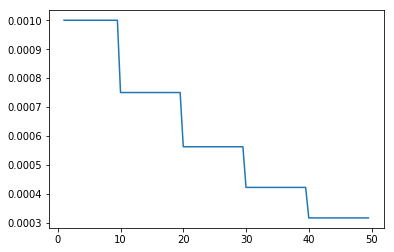

In [11]:
x_vec = np.arange(1.,50.,0.5)
plt.plot(x_vec, drop_schedule(x_vec))
plt.show()

## Training the model with LR schedule

In [12]:
drop_scheduler = LearningRateScheduler(drop_schedule)

In [13]:
clf_lr = initialize_model()
clf_lr_fitted = clf_lr.fit(scaler.transform(X_train), Y_train, epochs=300, batch_size=X_train.shape[0],
                                          validation_split=0.1, verbose=1, initial_epoch=0,
                                          callbacks=[drop_scheduler])

Train on 586 samples, validate on 66 samples
Epoch 1/300
586/586 [==============================] - 0s 255us/step - loss: 0.6907 - acc: 0.5631 - val_loss: 0.7057 - val_acc: 0.5606
Epoch 2/300
586/586 [==============================] - 0s 5us/step - loss: 0.6905 - acc: 0.5631 - val_loss: 0.7055 - val_acc: 0.5606
Epoch 3/300
586/586 [==============================] - 0s 4us/step - loss: 0.6904 - acc: 0.5631 - val_loss: 0.7053 - val_acc: 0.5606
Epoch 4/300
586/586 [==============================] - 0s 4us/step - loss: 0.6902 - acc: 0.5631 - val_loss: 0.7051 - val_acc: 0.5606
Epoch 5/300
586/586 [==============================] - 0s 5us/step - loss: 0.6900 - acc: 0.5631 - val_loss: 0.7049 - val_acc: 0.5606
Epoch 6/300
586/586 [==============================] - 0s 6us/step - loss: 0.6899 - acc: 0.5631 - val_loss: 0.7046 - val_acc: 0.5606
Epoch 7/300
586/586 [==============================] - 0s 6us/step - loss: 0.6897 - acc: 0.5666 - val_loss: 0.7044 - val_acc: 0.5606
Epoch 8/300
586/586 [=

Epoch 62/300
586/586 [==============================] - 0s 5us/step - loss: 0.6853 - acc: 0.5751 - val_loss: 0.6989 - val_acc: 0.5606
Epoch 63/300
586/586 [==============================] - 0s 7us/step - loss: 0.6853 - acc: 0.5751 - val_loss: 0.6989 - val_acc: 0.5606
Epoch 64/300
586/586 [==============================] - 0s 5us/step - loss: 0.6852 - acc: 0.5751 - val_loss: 0.6989 - val_acc: 0.5606
Epoch 65/300
586/586 [==============================] - 0s 5us/step - loss: 0.6852 - acc: 0.5751 - val_loss: 0.6988 - val_acc: 0.5606
Epoch 66/300
586/586 [==============================] - 0s 6us/step - loss: 0.6852 - acc: 0.5751 - val_loss: 0.6988 - val_acc: 0.5606
Epoch 67/300
586/586 [==============================] - 0s 4us/step - loss: 0.6851 - acc: 0.5751 - val_loss: 0.6987 - val_acc: 0.5606
Epoch 68/300
586/586 [==============================] - 0s 5us/step - loss: 0.6851 - acc: 0.5751 - val_loss: 0.6987 - val_acc: 0.5606
Epoch 69/300
586/586 [==============================] - 0s 6us

Epoch 123/300
586/586 [==============================] - 0s 6us/step - loss: 0.6844 - acc: 0.5751 - val_loss: 0.6978 - val_acc: 0.5606
Epoch 124/300
586/586 [==============================] - 0s 7us/step - loss: 0.6844 - acc: 0.5751 - val_loss: 0.6978 - val_acc: 0.5606
Epoch 125/300
586/586 [==============================] - 0s 6us/step - loss: 0.6844 - acc: 0.5751 - val_loss: 0.6978 - val_acc: 0.5606
Epoch 126/300
586/586 [==============================] - 0s 5us/step - loss: 0.6843 - acc: 0.5751 - val_loss: 0.6978 - val_acc: 0.5606
Epoch 127/300
586/586 [==============================] - 0s 6us/step - loss: 0.6843 - acc: 0.5751 - val_loss: 0.6978 - val_acc: 0.5606
Epoch 128/300
586/586 [==============================] - 0s 8us/step - loss: 0.6843 - acc: 0.5751 - val_loss: 0.6977 - val_acc: 0.5606
Epoch 129/300
586/586 [==============================] - 0s 5us/step - loss: 0.6843 - acc: 0.5751 - val_loss: 0.6977 - val_acc: 0.5606
Epoch 130/300
586/586 [==============================] 

Epoch 184/300
586/586 [==============================] - 0s 4us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 185/300
586/586 [==============================] - 0s 5us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 186/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 187/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 188/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 189/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 190/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6976 - val_acc: 0.5606
Epoch 191/300
586/586 [==============================] 

Epoch 245/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 246/300
586/586 [==============================] - 0s 7us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 247/300
586/586 [==============================] - 0s 6us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 248/300
586/586 [==============================] - 0s 5us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 249/300
586/586 [==============================] - 0s 4us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 250/300
586/586 [==============================] - 0s 5us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 251/300
586/586 [==============================] - 0s 5us/step - loss: 0.6842 - acc: 0.5751 - val_loss: 0.6975 - val_acc: 0.5606
Epoch 252/300
586/586 [==============================] 

In [14]:
Y_pred = clf_lr.predict_classes(scaler.transform(X_test))
print(classification_report(Y_test, Y_pred))

             precision    recall  f1-score   support

          0       0.71      0.67      0.69        72
          1       0.50      0.55      0.52        44

avg / total       0.63      0.62      0.62       116



## Include Early Stopping

In [15]:
early_stop_crit = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
clf_lr_early = initialize_model()
clf_lr_early_fitted = clf_lr_early.fit(scaler.transform(X_train), Y_train, epochs=500, batch_size=X_train.shape[0],
                                          validation_split=0.1, verbose=1, initial_epoch=0,
                                          callbacks=[drop_scheduler, early_stop_crit])

In [ ]:
Y_pred = clf_lr_early.predict_classes(scaler.transform(X_test))
print(classification_report(Y_test, Y_pred))

## Cosine Anealing

In [ ]:
min_val = 0.001
max_val = 0.1
cycle = 25

def cyclic_schedule(epoch):
    temp = np.mod(epoch, cycle)
    return min_val + 1/2 * (max_val - min_val) * (1 + np.cos(temp/cycle * np.pi ))

In [ ]:
x_vec = np.arange(1.,250.,0.5)
plt.plot(x_vec, cyclic_schedule(x_vec))
plt.show()

In [ ]:
cos_scheduler = LearningRateScheduler(cyclic_schedule)

In [ ]:
clf_lr2_early = initialize_model()
clf_lr2_early_fitted = clf_lr2_early.fit(scaler.transform(X_train), Y_train, epochs=500, batch_size=X_train.shape[0],
                                          validation_split=0.1, verbose=1, initial_epoch=0,
                                          callbacks=[cos_scheduler, early_stop_crit])

In [1]:
Y_pred = clf_lr2_early.predict_classes(scaler.transform(X_test))
print(classification_report(Y_test, Y_pred))

NameError: name 'clf_lr2_early' is not defined